In [125]:
pip install cpnet

In [126]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [127]:
# Read data from a CSV file into a DataFrame
df = pd.read_csv('witcher_network.csv')
df.head()

,Unnamed: 0,Source,Target,Type,Weight,book
0,0,Velerad,Geralt,Undirected,1,1
1,1,Geralt,Foltest,Undirected,5,1
2,2,Foltest,Geralt,Undirected,4,1
3,3,Adda,Geralt,Undirected,1,1
4,4,Geralt,Ostrit,Undirected,4,1


# Pre processing

In [128]:
# remove unuseful columns
df = df.drop(labels='Unnamed: 0', axis=1)
df = df.drop(labels='Type', axis=1)
df = df.rename(columns={'book': 'Book'})

df

,Source,Target,Weight,Book
0,Velerad,Geralt,1,1
1,Geralt,Foltest,5,1
2,Foltest,Geralt,4,1
3,Adda,Geralt,1,1
4,Geralt,Ostrit,4,1
...,...,...,...,...
2595,Lytta,Ciri,2,7
2596,Lytta,Triss,1,7
2597,Triss,Dandelion,1,7
2598,Triss,Yarpen,1,7


In [129]:
# sort in lexicographical order Source and Target
df['Source'], df['Target'] = zip(*df.apply(lambda row: sorted([row['Source'], row['Target']]), axis=1))

# groupby: Among rows with same Source, Target and Book select the one with largest weight
df_proc = df.groupby(['Source', 'Target', 'Book']).agg({'Weight': 'max'}).reset_index()

In [130]:
# save dataframe in csv
# df_proc.to_csv('df_grouped.csv', index=False)
print(df_proc.shape)
print(df.shape)

(1770, 4)
(2600, 4)


In [131]:
df_proc

,Source,Target,Book,Weight
0,Adalia,Anna,5,1
1,Adalia,Assire,5,2
2,Adalia,Calanthe,5,1
3,Adalia,Francesca,5,1
4,Adalia,Margarita,5,1
...,...,...,...,...
1765,Yarpen,Yennefer,3,1
1766,Yarpen,Yennefer,4,2
1767,Yarpen,Zoltan,7,8
1768,Yennefer,Yurga,2,1


# Graph creation

Creating the graphs for all 7 books

In [132]:
# subgraphs for all 7 books

df_book1 = df_proc[df_proc['Book']==1]
df_book2 = df_proc[df_proc['Book']==2]
df_book3 = df_proc[df_proc['Book']==3]
df_book4 = df_proc[df_proc['Book']==4]
df_book5 = df_proc[df_proc['Book']==5]
df_book6 = df_proc[df_proc['Book']==6]
df_book7 = df_proc[df_proc['Book']==7]

In [133]:
# Create a graph from the dataframe
G_1 = nx.from_pandas_edgelist(df_book1, 'Source', 'Target', edge_attr=True)
G_2 = nx.from_pandas_edgelist(df_book2, 'Source', 'Target', edge_attr=True)
G_3 = nx.from_pandas_edgelist(df_book3, 'Source', 'Target', edge_attr=True)
G_4 = nx.from_pandas_edgelist(df_book4, 'Source', 'Target', edge_attr=True)
G_5 = nx.from_pandas_edgelist(df_book5, 'Source', 'Target', edge_attr=True)
G_6 = nx.from_pandas_edgelist(df_book6, 'Source', 'Target', edge_attr=True)
G_7 = nx.from_pandas_edgelist(df_book7, 'Source', 'Target', edge_attr=True)


In [134]:
# Draw the graph
#plt.figure(figsize=(20, 20))
#nx.draw(G_5, with_labels=True)
#plt.show()

Dataframes for nodes and edges + save as csv files -> used for Gephi visualization

In [135]:
# Create a DataFrame for nodes
df_nodes1 = pd.DataFrame(G_1.nodes(), columns=['Nodes'])
df_nodes2 = pd.DataFrame(G_2.nodes(), columns=['Nodes'])
df_nodes3 = pd.DataFrame(G_3.nodes(), columns=['Nodes'])
df_nodes4 = pd.DataFrame(G_4.nodes(), columns=['Nodes'])
df_nodes5 = pd.DataFrame(G_5.nodes(), columns=['Nodes'])
df_nodes6 = pd.DataFrame(G_6.nodes(), columns=['Nodes'])
df_nodes7 = pd.DataFrame(G_7.nodes(), columns=['Nodes'])

# print("Nodes of graph G_1:")
# print(df_nodes1)

In [136]:
# Create a DataFrame for edges
df_edges1 = pd.DataFrame(list(G_1.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges2 = pd.DataFrame(list(G_2.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges3 = pd.DataFrame(list(G_3.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges4 = pd.DataFrame(list(G_4.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges5 = pd.DataFrame(list(G_5.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges6 = pd.DataFrame(list(G_6.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges7 = pd.DataFrame(list(G_7.edges(data=True)), columns=['Source', 'Target', 'Attributes'])

# print("Edges of graph G_1:")
# print(df_edges1)


In [137]:
df_edges1.head()

,Source,Target,Attributes
0,Adda,Foltest,"{'Book': 1, 'Weight': 1}"
1,Adda,Geralt,"{'Book': 1, 'Weight': 2}"
2,Foltest,Geralt,"{'Book': 1, 'Weight': 5}"
3,Foltest,Ostrit,"{'Book': 1, 'Weight': 1}"
4,Foltest,Two,"{'Book': 1, 'Weight': 1}"


In [138]:
# Creation of column "Book" and "Weight" -> (apply a lambda function to the "Attributes" column)
df_edges1[['Book', 'Weight']] = df_edges1['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges2[['Book', 'Weight']] = df_edges2['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges3[['Book', 'Weight']] = df_edges3['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges4[['Book', 'Weight']] = df_edges4['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges5[['Book', 'Weight']] = df_edges5['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges6[['Book', 'Weight']] = df_edges6['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges7[['Book', 'Weight']] = df_edges7['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))


# Drop of the "Attributes" column
df_edges1.drop('Attributes', axis=1, inplace=True)
df_edges2.drop('Attributes', axis=1, inplace=True)
df_edges3.drop('Attributes', axis=1, inplace=True)
df_edges4.drop('Attributes', axis=1, inplace=True)
df_edges5.drop('Attributes', axis=1, inplace=True)
df_edges6.drop('Attributes', axis=1, inplace=True)
df_edges7.drop('Attributes', axis=1, inplace=True)

In [139]:
df_edges1.head()

,Source,Target,Book,Weight
0,Adda,Foltest,1,1
1,Adda,Geralt,1,2
2,Foltest,Geralt,1,5
3,Foltest,Ostrit,1,1
4,Foltest,Two,1,1


Download of the edges and nodes dataframes

In [140]:
!mkdir nodes_gephi
!mkdir edges_gephi

mkdir: cannot create directory ‘nodes_gephi’: File exists
mkdir: cannot create directory ‘edges_gephi’: File exists


In [141]:
# Save nodes DataFrame to a CSV file
df_nodes1.to_csv('nodes_gephi/nodes_book1.csv', index=False)
df_nodes2.to_csv('nodes_gephi/nodes_book2.csv', index=False)
df_nodes3.to_csv('nodes_gephi/nodes_book3.csv', index=False)
df_nodes4.to_csv('nodes_gephi/nodes_book4.csv', index=False)
df_nodes5.to_csv('nodes_gephi/nodes_book5.csv', index=False)
df_nodes6.to_csv('nodes_gephi/nodes_book6.csv', index=False)
df_nodes7.to_csv('nodes_gephi/nodes_book7.csv', index=False)

# Save edges DataFrame to a CSV file
df_edges1.to_csv('edges_gephi/edges_book1.csv', index=False)
df_edges2.to_csv('edges_gephi/edges_book2.csv', index=False)
df_edges3.to_csv('edges_gephi/edges_book3.csv', index=False)
df_edges4.to_csv('edges_gephi/edges_book4.csv', index=False)
df_edges5.to_csv('edges_gephi/edges_book5.csv', index=False)
df_edges6.to_csv('edges_gephi/edges_book6.csv', index=False)
df_edges7.to_csv('edges_gephi/edges_book7.csv', index=False)

In [142]:
!zip -r /content/edges_gephi.zip /content/edges_gephi
!zip -r /content/nodes_gephi.zip /content/nodes_gephi

updating: content/edges_gephi/ (stored 0%)
updating: content/edges_gephi/edges_book4.csv (deflated 75%)
updating: content/edges_gephi/edges_book3.csv (deflated 73%)
updating: content/edges_gephi/edges_book1.csv (deflated 73%)
updating: content/edges_gephi/edges_book5.csv (deflated 75%)
updating: content/edges_gephi/edges_book7.csv (deflated 75%)
updating: content/edges_gephi/edges_book6.csv (deflated 73%)
updating: content/edges_gephi/edges_book2.csv (deflated 69%)
updating: content/nodes_gephi/ (stored 0%)
updating: content/nodes_gephi/nodes_book1.csv (deflated 34%)
updating: content/nodes_gephi/nodes_book6.csv (deflated 34%)
updating: content/nodes_gephi/nodes_book7.csv (deflated 37%)
updating: content/nodes_gephi/nodes_book2.csv (deflated 25%)
updating: content/nodes_gephi/nodes_book4.csv (deflated 36%)
updating: content/nodes_gephi/nodes_book3.csv (deflated 32%)
updating: content/nodes_gephi/nodes_book5.csv (deflated 35%)


In [143]:
from google.colab import files
files.download("/content/edges_gephi.zip")
files.download("/content/nodes_gephi.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Measures

## Degree Centrality

Number of edges connected to a node

In [144]:
#compute degree centrality on all books
degree_1 = nx.degree_centrality(G_1)
degree_2 = nx.degree_centrality(G_2)
degree_3 = nx.degree_centrality(G_3)
degree_4 = nx.degree_centrality(G_4)
degree_5 = nx.degree_centrality(G_5)
degree_6 = nx.degree_centrality(G_6)
degree_7 = nx.degree_centrality(G_7)

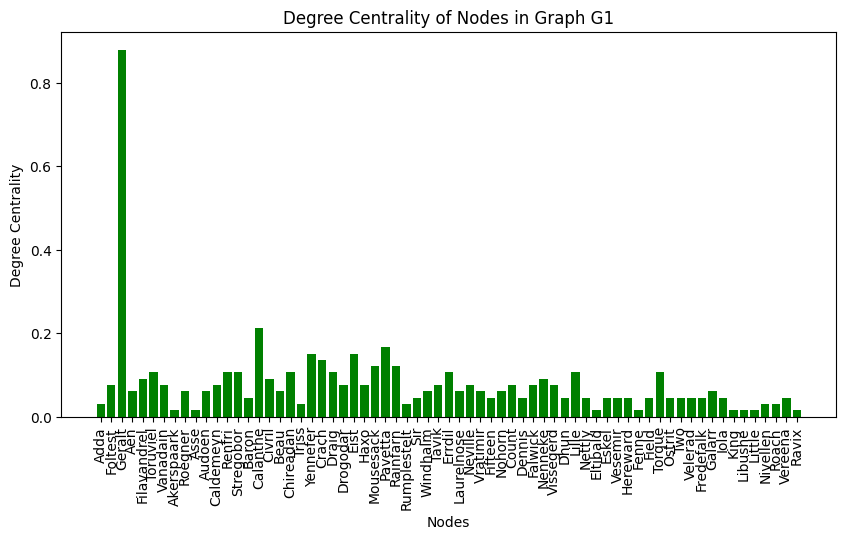

In [145]:
# show the histogram of degree centrality values for all books

# book1
degree_nodes_1 = degree_1.keys()
degree_centralities_1 = degree_1.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_1, degree_centralities_1, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [146]:
# # BOOK2
# degree_nodes_2 = degree_2.keys()
# degree_centralities_2 = degree_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_2, degree_centralities_2, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK3
# degree_nodes_3 = degree_3.keys()
# degree_centralities_3= degree_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_3, degree_centralities_3, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()



# # BOOK4
# degree_nodes_4 = degree_4.keys()
# degree_centralities_4= degree_4.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_4, degree_centralities_4, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK5
# degree_nodes_5 = degree_5.keys()
# degree_centralities_5= degree_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_5, degree_centralities_5, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK6
# degree_nodes_6 = degree_6.keys()
# degree_centralities_6 = degree_6.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_6, degree_centralities_6, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# # BOOK7
# degree_nodes_7 = degree_7.keys()
# degree_centralities_7= degree_7.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_7, degree_centralities_7, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

In [147]:
# Find nodes with degree centrality above a certain threshold: they are the most important nodes (with more edges)
threshold = 0.2

high_degree_nodes_1 = [node for node, deg in degree_1.items() if deg > threshold]
high_degree_nodes_2 = [node for node, deg in degree_2.items() if deg > threshold]
high_degree_nodes_3 = [node for node, deg in degree_3.items() if deg > threshold]
high_degree_nodes_4 = [node for node, deg in degree_4.items() if deg > threshold]
high_degree_nodes_5 = [node for node, deg in degree_5.items() if deg > threshold]
high_degree_nodes_6 = [node for node, deg in degree_6.items() if deg > threshold]
high_degree_nodes_7 = [node for node, deg in degree_7.items() if deg > threshold]

print("Graph 1 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_1)
print("Graph 2 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_2)
print("Graph 3 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_3)
print("Graph 4 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_4)
print("Graph 5 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_5)
print("Graph 6 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_6)
print("Graph 7 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_7)


Graph 1 - Nodes with degree centrality above  0.2 :  ['Geralt', 'Calanthe']
Graph 2 - Nodes with degree centrality above  0.2 :  ['Braenn', 'Geralt', 'Dandelion', 'Ciri', 'Yurga']
Graph 3 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Yennefer', 'Dandelion', 'Geralt', 'Calanthe', 'Foltest', 'King', 'Rience', 'Triss']
Graph 4 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Codringher', 'Emhyr', 'Geralt', 'Yennefer', 'Gar', 'Philippa', 'Tissaia', 'Vilgefortz', 'Sabrina']
Graph 5 - Nodes with degree centrality above  0.2 :  ['Assire', 'Francesca', 'Sabrina', 'Yennefer', 'Dandelion', 'Fringilla', 'Geralt', 'Ida', 'Milva', 'Philippa', 'Ciri', 'Cahir', 'Emhyr', 'Zoltan']
Graph 6 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Geralt', 'Baron', 'Emhyr']
Graph 7 - Nodes with degree centrality above  0.2 :  ['Ciri', 'King', 'Yennefer', 'Dandelion', 'Geralt', 'Emhyr']


#### Degree centrality ***distribution***

For each degree value, how many occurencies (nodes) have that value

In [148]:
# # Histo With COUNTS on y axis
# commented because it's better to use frequencies on y axis
# # BOOK 1
# degree_values = list(degree_1.values())

# plt.hist(degree_values, bins=60, color='g')
# plt.xlabel('Degree Centrality')
# plt.ylabel('Counts')
# plt.title('Degree Distribution of Nodes in Graph G1')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()

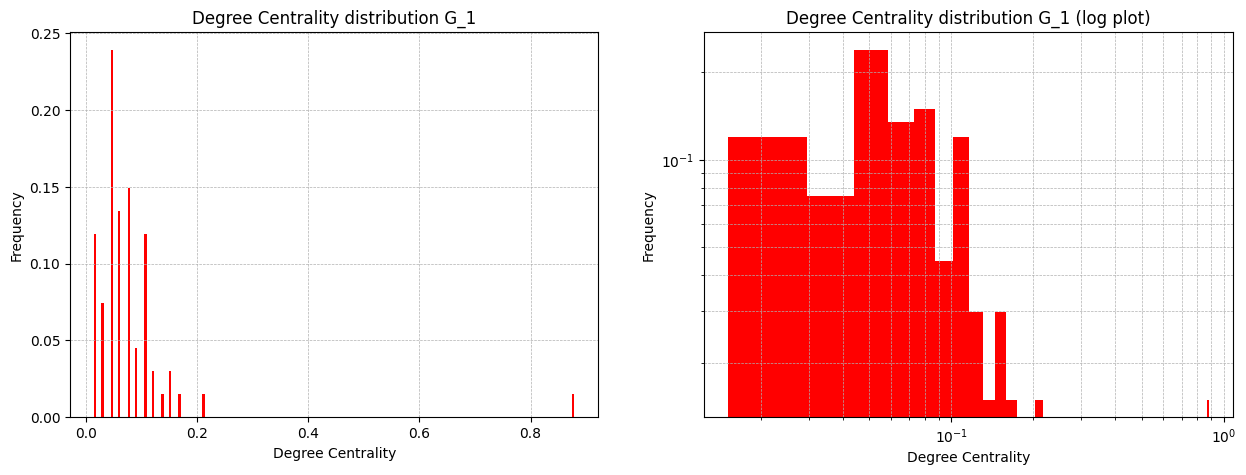

In [149]:
# with frequencies on the y axis (normal scale on the left, log scale on the right)

# Extract the values and compute the frequencies
values = list(degree_1.values())
frequencies = np.bincount(values)


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(values, bins=200, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(1, 2, 2)
#log plot
plt.hist(values, bins=60, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_1 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


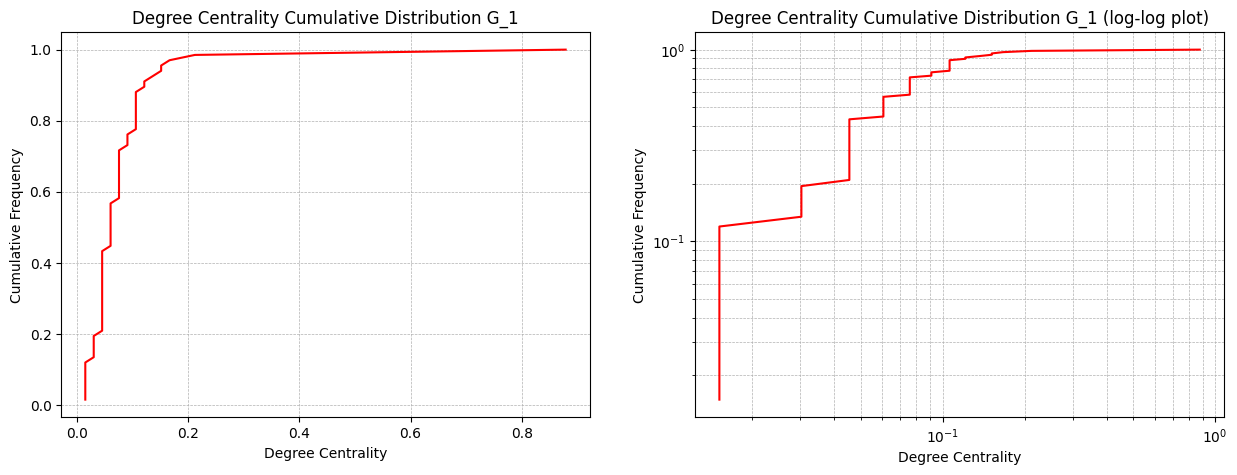

In [150]:
# try to find the cumulative

# Extract the values and compute the frequencies
values = list(degree_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1, 2, 2)
#log plot
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


 REPEAT THE SAME CODE OF THE PREVIOUS CELL FOR ALL THE OTHER 6 BOOKS ->
 IMAGES FOR THE REPORT

In [151]:
# # for debugging, to check if the frequecies are actual frequencies (the total sum must be 1).

# counts, bin_edges = np.histogram(values, bins=60, weights=np.ones(len(values)) / len(values))


# total_sum = 0

# for i in range(len(counts)):
#   total_sum = total_sum + counts[i]

# print(total_sum) # should be 1

In [152]:
# BOOK2

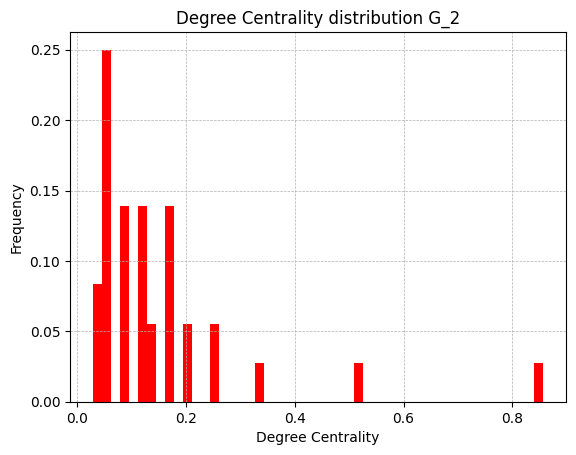

In [153]:
# with frequencies on the y axis

# Extract the values and compute the frequencies
values = list(degree_2.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=50, color = 'r', weights=np.ones(len(values)) / len(values))
# Label the axes
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_2')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


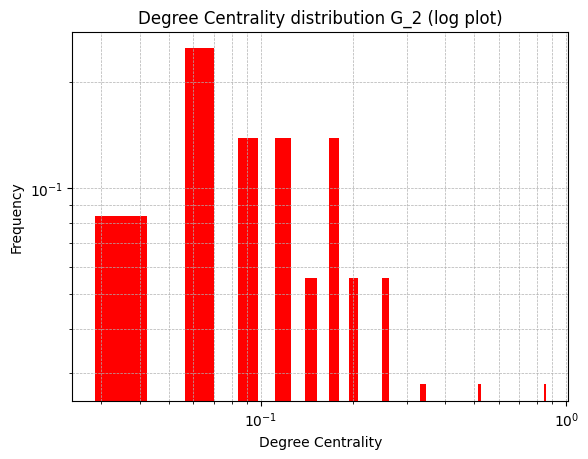

In [154]:
# with frequencies on the y axis - same as previous cell BUT in log scal to check if it's a line (it's not)

# Extract the values and compute the frequencies
values = list(degree_2.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=60, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_2 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [155]:
# BOOK3

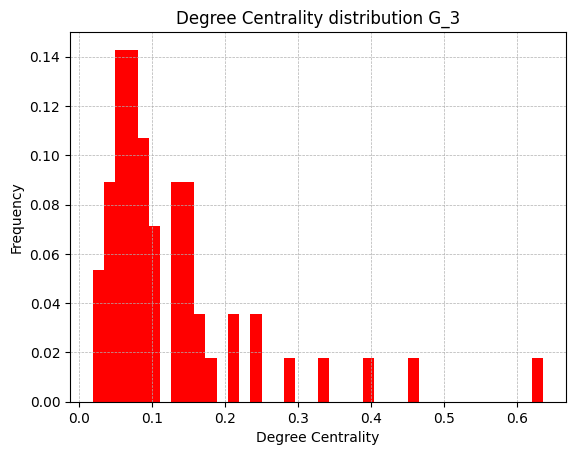

In [156]:
# with frequencies on the y axis

# Extract the values and compute the frequencies
values = list(degree_3.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=40, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_3')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


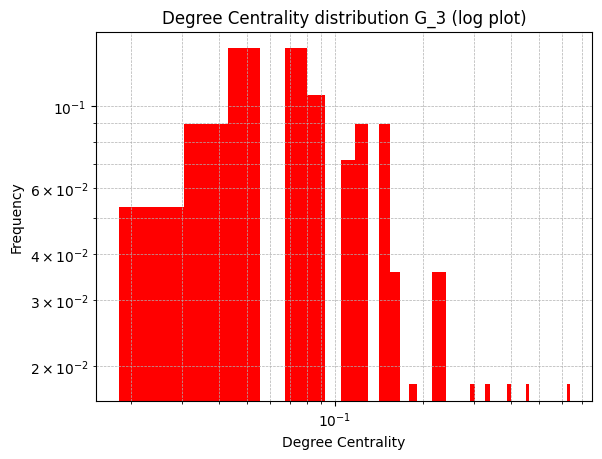

In [157]:
# with frequencies on the y axis - same as previous cell BUT in log scal to check if it's a line (it's not)

# Extract the values and compute the frequencies
values = list(degree_3.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=50, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_3 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [158]:
# BOOK4

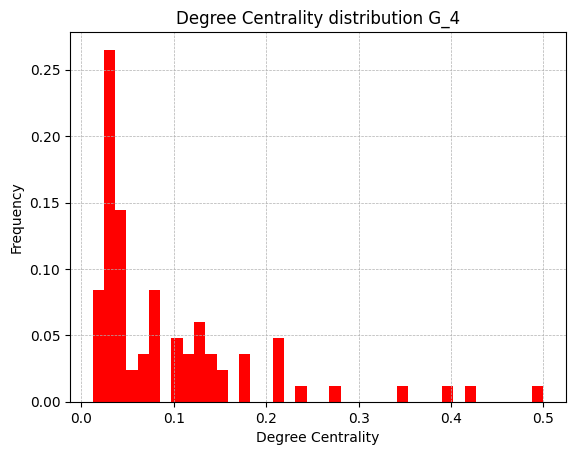

In [159]:
# with frequencies on the y axis

# Extract the values and compute the frequencies
values = list(degree_4.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=40, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_4')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


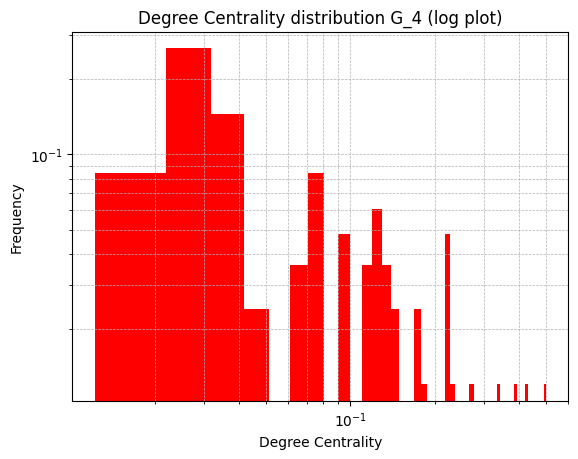

In [160]:
# with frequencies on the y axis - same as previous cell BUT in log scal to check if it's a line (it's not)

# Extract the values and compute the frequencies
values = list(degree_4.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=50, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_4 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [161]:
# BOOK5

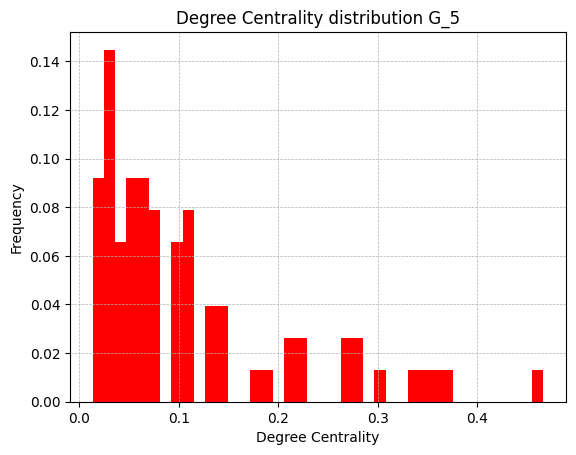

In [162]:
# with frequencies on the y axis

# Extract the values and compute the frequencies
values = list(degree_5.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=40, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_5')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


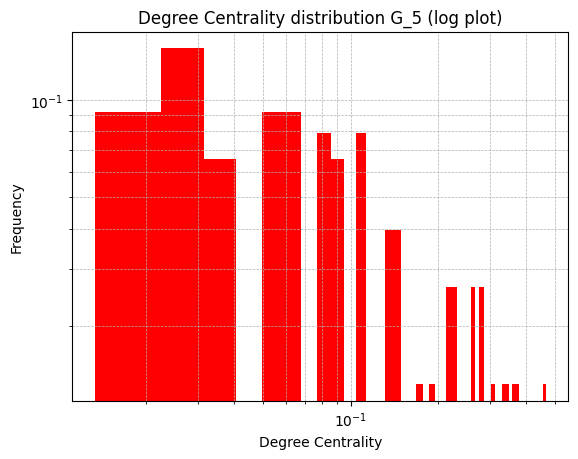

In [163]:
# with frequencies on the y axis - same as previous cell BUT in log scal to check if it's a line (it's not)

# Extract the values and compute the frequencies
values = list(degree_5.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=50, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_5 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [164]:
# BOOK6

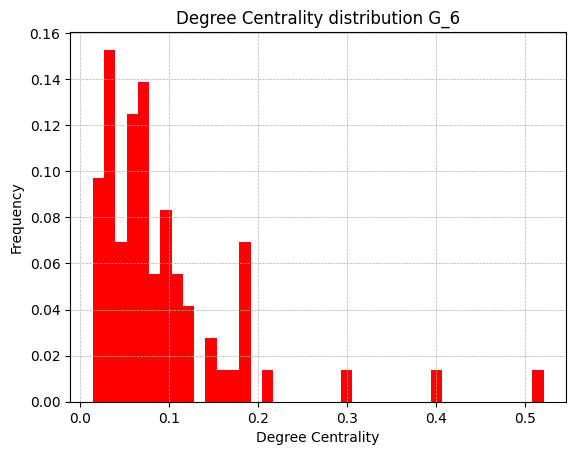

In [165]:
# with frequencies on the y axis

# Extract the values and compute the frequencies
values = list(degree_6.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=40, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_6')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


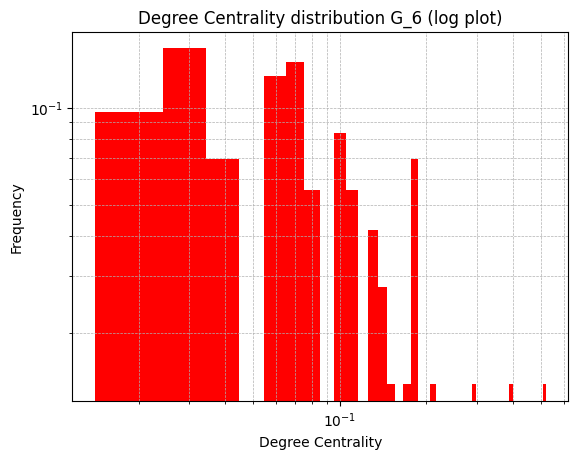

In [166]:
# with frequencies on the y axis - same as previous cell BUT in log scal to check if it's a line (it's not)

# Extract the values and compute the frequencies
values = list(degree_6.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=50, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_6 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [167]:
# BOOK7

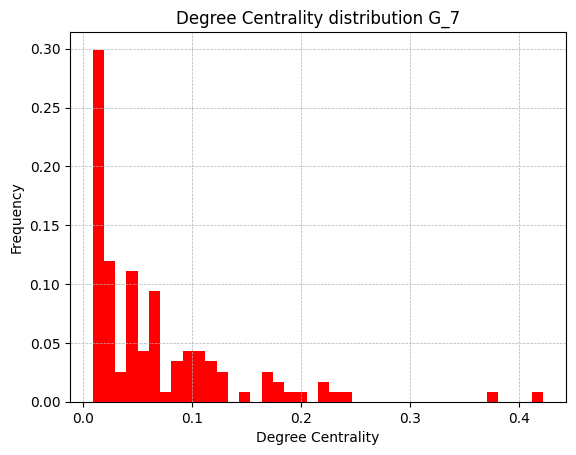

In [168]:
# with frequencies on the y axis

# Extract the values and compute the frequencies
values = list(degree_7.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=40, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_7')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


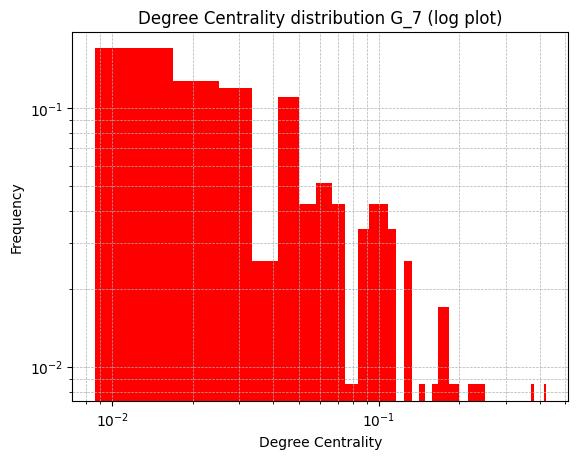

In [169]:
# with frequencies on the y axis - same as previous cell BUT in log scal to check if it's a line (it's not)

# Extract the values and compute the frequencies
values = list(degree_7.values())
frequencies = np.bincount(values)

# Create the histogram
plt.hist(values, bins=50, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_7 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


## Eigenvector centrality

In [170]:
eig_centrality_1 = nx.eigenvector_centrality(G_1, weight='Weight')
eig_centrality_2 = nx.eigenvector_centrality(G_2, weight='Weight')
eig_centrality_3 = nx.eigenvector_centrality(G_3, weight='Weight')
eig_centrality_4 = nx.eigenvector_centrality(G_4, weight='Weight')
eig_centrality_5 = nx.eigenvector_centrality(G_5, weight='Weight')
eig_centrality_6 = nx.eigenvector_centrality(G_6, weight='Weight')
eig_centrality_7 = nx.eigenvector_centrality(G_7, weight='Weight')

#centrality_1

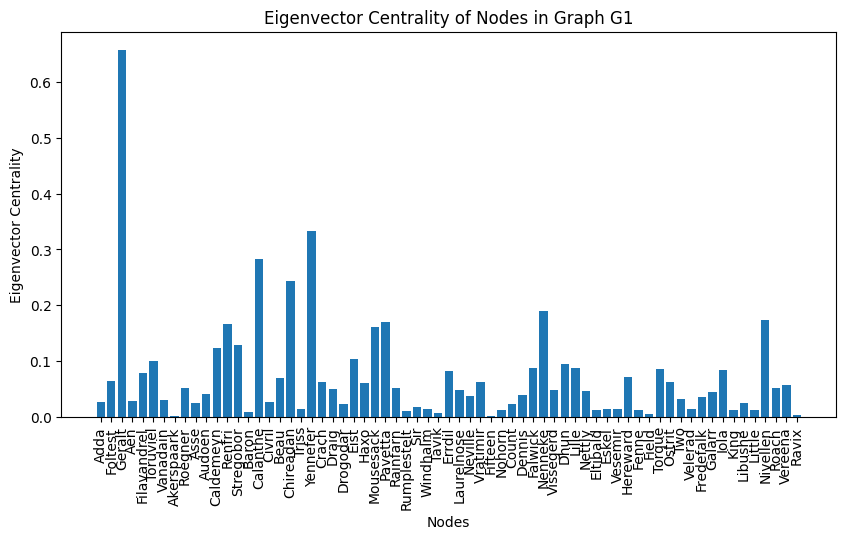

In [171]:
# BOOK 1
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = eig_centrality_1.keys()
centralities = eig_centrality_1.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [172]:
# # BOOK 2
# # Assuming 'centrality' is your computed eigenvector centrality dictionary
# nodes = eig_centrality_2.keys()
# centralities = eig_centrality_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# # Assuming 'centrality' is your computed eigenvector centrality dictionary
# nodes = eig_centrality_3.keys()
# centralities = eig_centrality_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 4
# # Assuming 'centrality' is your computed eigenvector centrality dictionary
# nodes = eig_centrality_4.keys()
# centralities = eig_centrality_4.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 5
# # Assuming 'centrality' is your computed eigenvector centrality dictionary
# nodes = eig_centrality_5.keys()
# centralities = eig_centrality_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()



# BOOK 6
# # Assuming 'centrality' is your computed eigenvector centrality dictionary
# nodes = eig_centrality_6.keys()
# centralities = eig_centrality_6.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 7
# # Assuming 'centrality' is your computed eigenvector centrality dictionary
# nodes = eig_centrality_7.keys()
# centralities = eig_centrality_7.values()

# plt.figure(figsize=(20,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Eigenvector centrality *distribution*

In [173]:
#BOOK1

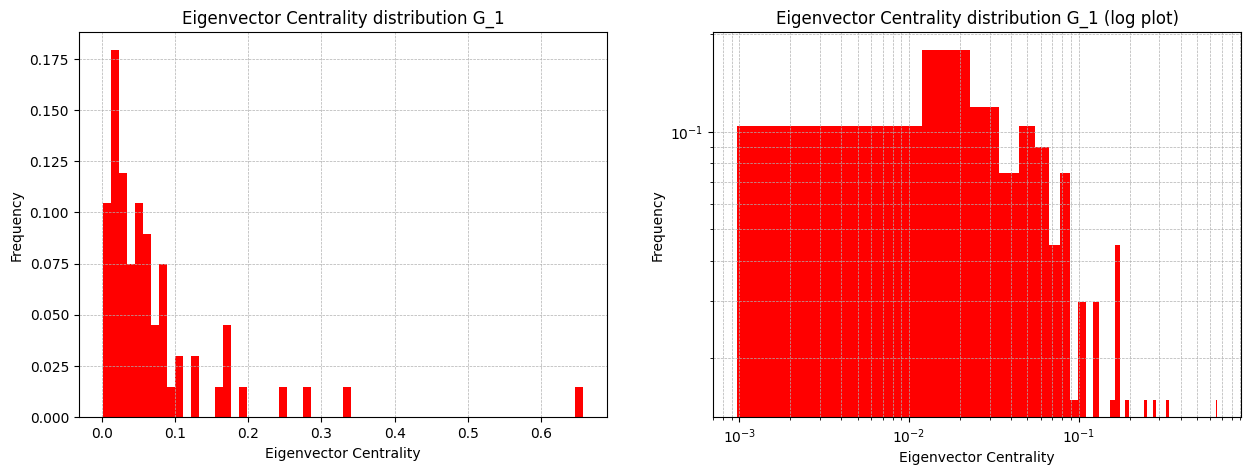

In [174]:
# with frequencies on the y axis (normal scale on the left, log scale on the right)

# Extract the values and compute the frequencies
values = list(eig_centrality_1.values())
frequencies = np.bincount(values)


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(values, bins=60, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(1, 2, 2)
#log plot
plt.hist(values, bins=60, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_1 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


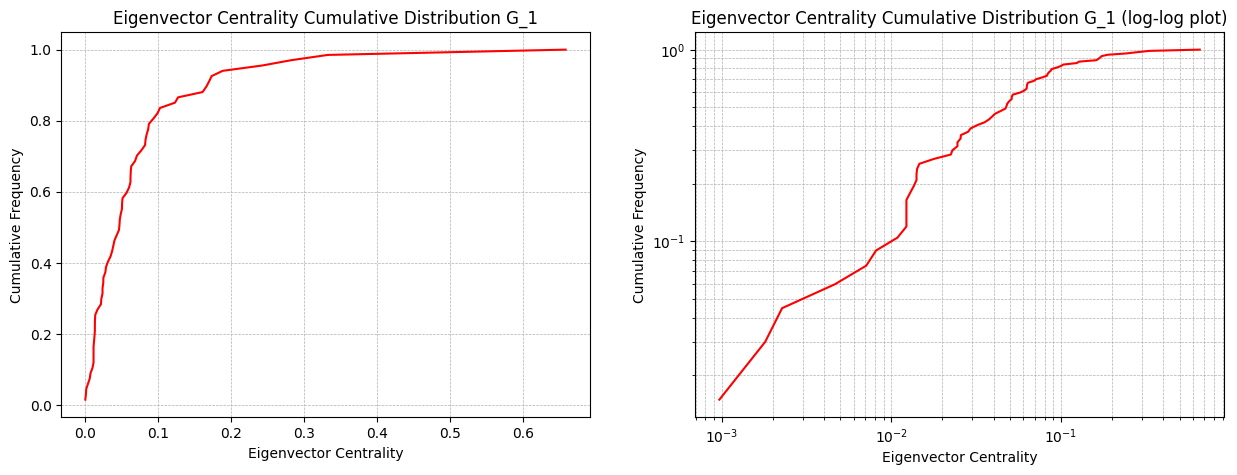

In [175]:
# try to find the cumulative

# Extract the values and compute the frequencies
values = list(eig_centrality_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1, 2, 2)
#log plot
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


## Closeness centrality

In [176]:
closeness_1 = nx.closeness_centrality(G_1)
closeness_2 = nx.closeness_centrality(G_2)
closeness_3 = nx.closeness_centrality(G_3)
closeness_4 = nx.closeness_centrality(G_4)
closeness_5 = nx.closeness_centrality(G_5)
closeness_6 = nx.closeness_centrality(G_6)
closeness_7 = nx.closeness_centrality(G_7)

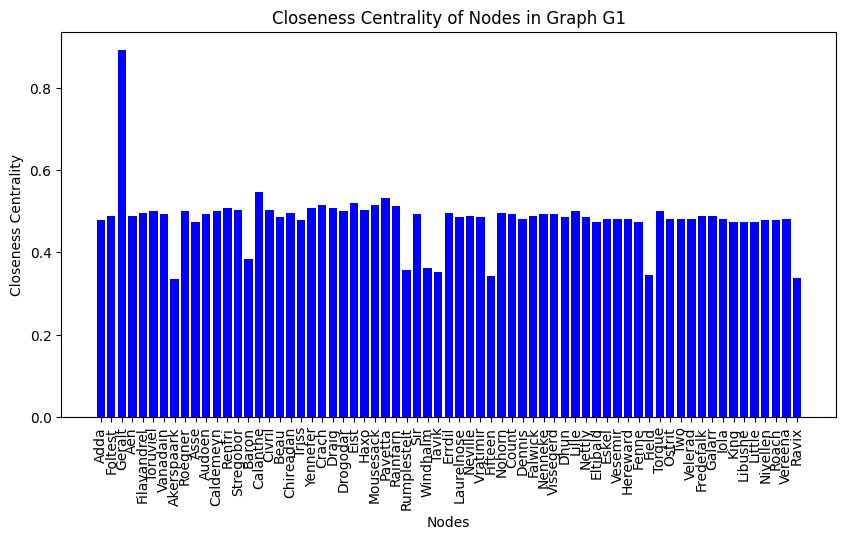

In [177]:
# BOOK 1
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_1.keys()
closeness_centralities = closeness_1.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [178]:
# # BOOK 2
# # Assuming 'closeness' is your computed closeness centrality dictionary
# closeness_nodes = closeness_2.keys()
# closeness_centralities = closeness_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# # Assuming 'closeness' is your computed closeness centrality dictionary
# closeness_nodes = closeness_3.keys()
# closeness_centralities = closeness_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 4
# # Assuming 'closeness' is your computed closeness centrality dictionary
# closeness_nodes = closeness_4.keys()
# closeness_centralities = closeness_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()



# BOOK 5
# # Assuming 'closeness' is your computed closeness centrality dictionary
# closeness_nodes = closeness_5.keys()
# closeness_centralities = closeness_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()




# BOOK 6
# # Assuming 'closeness' is your computed closeness centrality dictionary
# closeness_nodes = closeness_6.keys()
# closeness_centralities = closeness_6.values()

# plt.figure(figsize=(13,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()



# BOOK 7
# # Assuming 'closeness' is your computed closeness centrality dictionary
# closeness_nodes = closeness_7.keys()
# closeness_centralities = closeness_7.values()

# plt.figure(figsize=(15,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Closeness centrality ***distribution***

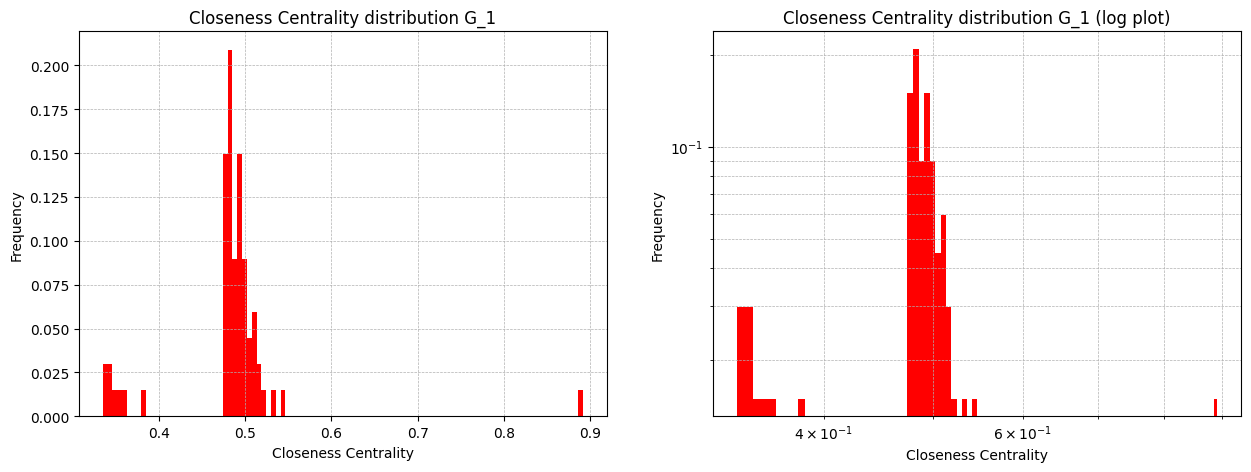

In [179]:
# with frequencies on the y axis (normal scale on the left, log scale on the right)

# Extract the values and compute the frequencies
values = list(closeness_1.values())
frequencies = np.bincount(values)


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(values, bins=100, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(1, 2, 2)
#log plot
plt.hist(values, bins=100, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_1 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


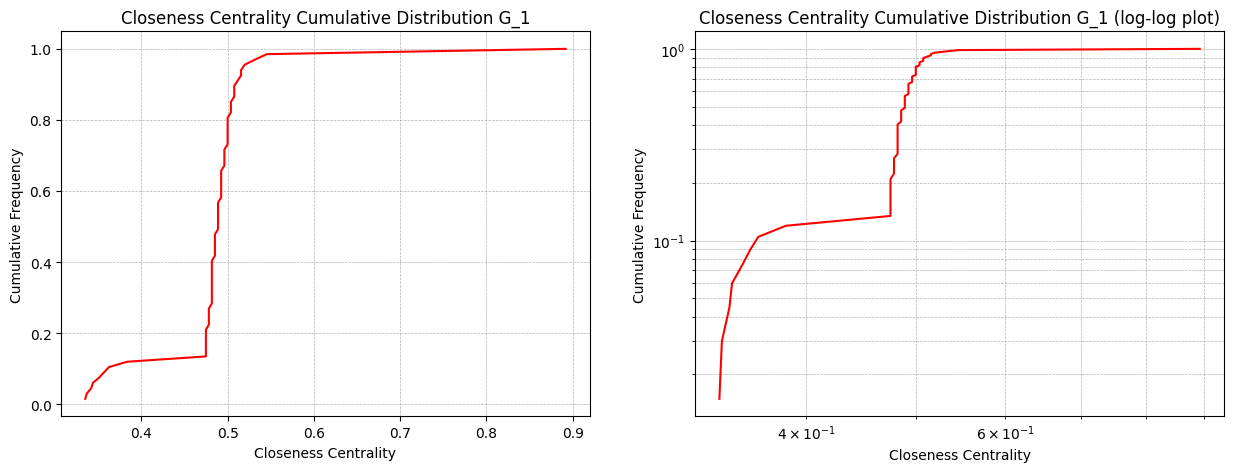

In [180]:
# try to find the cumulative

# Extract the values and compute the frequencies
values = list(closeness_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Closeness Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1, 2, 2)
#log plot
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Closeness Centrality Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


## Betweenness centrality

In [181]:
betweenness_1 = nx.betweenness_centrality(G_1, normalized=True, weight='Weight')
betweenness_2 = nx.betweenness_centrality(G_2, normalized=True, weight='Weight')
betweenness_3 = nx.betweenness_centrality(G_3, normalized=True, weight='Weight')
betweenness_4 = nx.betweenness_centrality(G_4, normalized=True, weight='Weight')
betweenness_5 = nx.betweenness_centrality(G_5, normalized=True, weight='Weight')
betweenness_6 = nx.betweenness_centrality(G_6, normalized=True, weight='Weight')
betweenness_7 = nx.betweenness_centrality(G_7, normalized=True, weight='Weight')


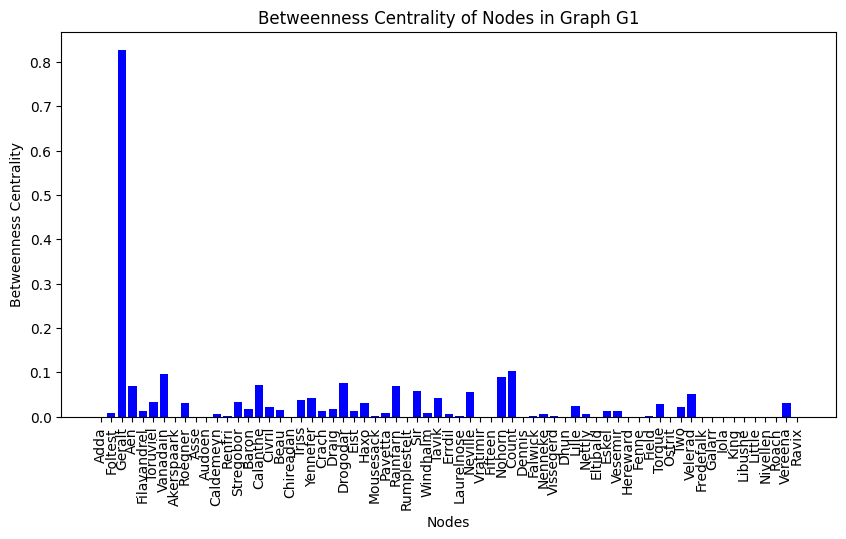

In [182]:
# BOOK 1
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_1.keys()
betweenness_centralities = betweenness_1.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()



# BOOK 2
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_2.keys()
# betweenness_centralities = betweenness_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_3.keys()
# betweenness_centralities = betweenness_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 4
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_4.keys()
# betweenness_centralities = betweenness_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()



# BOOK 5
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_5.keys()
# betweenness_centralities = betweenness_5.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 6
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_6.keys()
# betweenness_centralities = betweenness_6.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 7
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_7.keys()
# betweenness_centralities = betweenness_7.values()

# plt.figure(figsize=(15,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Betweenness Centrality ***distribution***

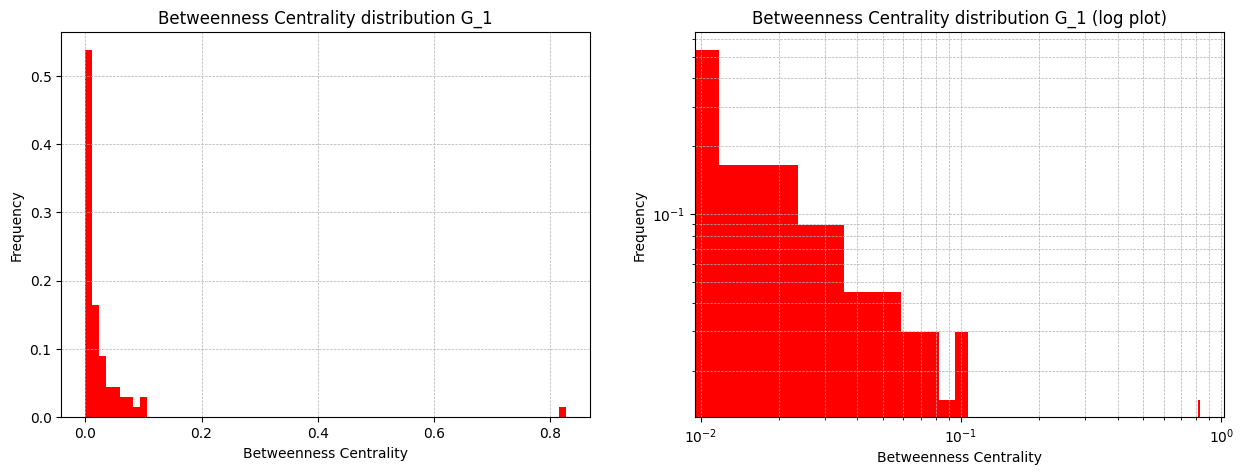

In [211]:
# with frequencies on the y axis (normal scale on the left, log scale on the right)

# Extract the values and compute the frequencies
values = list(betweenness_1.values())
frequencies = np.bincount(values)


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(values, bins=70, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(1, 2, 2)
#log plot
plt.hist(values, bins=70, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_1 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


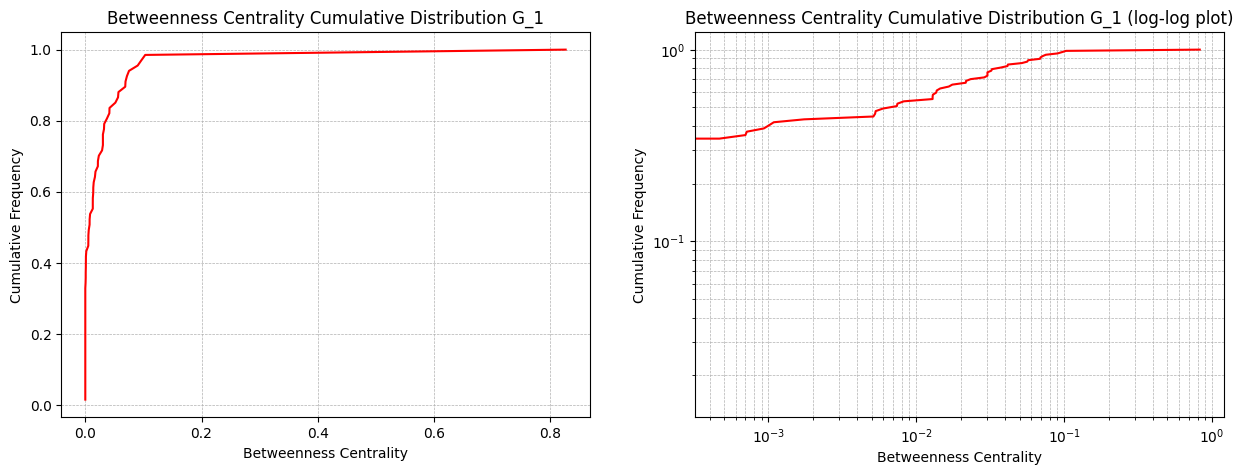

In [212]:
# try to find the cumulative

# Extract the values and compute the frequencies
values = list(betweenness_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1, 2, 2)
#log plot
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


## Cliques

In [189]:
# BOOK 1
cliques = list(nx.find_cliques(G_1))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Tavik', 'Caldemeyn', 'Renfri']
Clique 2: ['Tavik', 'Civril', 'Renfri']
Clique 3: ['Tavik', 'Civril', 'Nohorn', 'Fifteen']
Clique 4: ['Field', 'Lille', 'Torque', 'Filavandrel']
Clique 5: ['Akerspaark', 'Roegner']
Clique 6: ['Baron', 'Stregobor']
Clique 7: ['Baron', 'Calanthe']
Clique 8: ['Baron', 'Civril']
Clique 9: ['Geralt', 'Vanadain', 'Toruviel', 'Torque', 'Galarr']
Clique 10: ['Geralt', 'Vanadain', 'Toruviel', 'Aen']
Clique 11: ['Geralt', 'Vesemir', 'Errdil', 'Eskel']
Clique 12: ['Geralt', 'Nohorn', 'Civril']
Clique 13: ['Geralt', 'Dhun', 'Lille', 'Nettly']
Clique 14: ['Geralt', 'Velerad', 'Ostrit', 'Foltest']
Clique 15: ['Geralt', 'Beau', 'Chireadan', 'Yennefer']
Clique 16: ['Geralt', 'Beau', 'Triss']
Clique 17: ['Geralt', 'Dennis', 'Falwick', 'Count']
Clique 18: ['Geralt', 'Eltibald']
Clique 19: ['Geralt', 'Iola', 'Nenneke', 'Yennefer']
Clique 20: ['Geralt', 'Fenne']
Clique 21: ['Geralt', 'Stregobor', 'Renfri', 'Caldemeyn', 'Audoen']
Clique 22: ['Geralt', 'Stregobor',

In [190]:
# BOOK 2
cliques = list(nx.find_cliques(G_2))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Two', 'Ciri']
Clique 2: ['Veverka', 'Dandelion']
Clique 3: ['Guy', 'Ciri']
Clique 4: ['Sir', 'Seven', 'Herbolth']
Clique 5: ['Sir', 'Ciri', 'Freixenet', 'Braenn']
Clique 6: ['Sir', 'Ciri', 'Yurga']
Clique 7: ['Geralt', 'Istredd', 'Herbolth']
Clique 8: ['Geralt', 'Istredd', 'Yennefer']
Clique 9: ['Geralt', 'Visenna', 'Yurga']
Clique 10: ['Geralt', 'Freixenet', 'Eithné', 'Ciri', 'Braenn']
Clique 11: ['Geralt', 'Freixenet', 'Eithné', 'Venzlav']
Clique 12: ['Geralt', 'Triss', 'Yurga']
Clique 13: ['Geralt', 'King', 'Yurga']
Clique 14: ['Geralt', 'Eithné', 'Calanthe', 'Ciri']
Clique 15: ['Geralt', 'Eithné', 'Yennefer']
Clique 16: ['Geralt', 'Pavetta', 'Ciri', 'Calanthe']
Clique 17: ['Geralt', 'Yurga', 'Ciri', 'Mousesack']
Clique 18: ['Geralt', 'Yurga', 'Roach']
Clique 19: ['Geralt', 'Yurga', 'Yennefer']
Clique 20: ['Geralt', 'Seven', 'Herbolth']
Clique 21: ['Geralt', 'Dandelion', 'Sword', 'Little']
Clique 22: ['Geralt', 'Dandelion', 'Sword', 'Braenn']
Clique 23: ['Geralt', 'Dande

In [191]:
# BOOK 3
cliques = list(nx.find_cliques(G_3))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Ciri', 'Jan']
Clique 2: ['Ciri', 'Two', 'Shani', 'Dandelion', 'Rience']
Clique 3: ['Ciri', 'Two', 'Triss']
Clique 4: ['Ciri', 'Blue', 'Dandelion', 'Yennefer']
Clique 5: ['Ciri', 'Ithlinne', 'Yennefer', 'Sword', 'Nenneke']
Clique 6: ['Ciri', 'Pavetta', 'Calanthe']
Clique 7: ['Ciri', 'Regan', 'Yarpen', 'Yannick']
Clique 8: ['Ciri', 'Crach', 'Eist', 'Calanthe']
Clique 9: ['Ciri', 'Crach', 'Henselt']
Clique 10: ['Ciri', 'Henselt', 'King']
Clique 11: ['Ciri', 'Yannick', 'Paulie', 'Yarpen']
Clique 12: ['Ciri', 'Roach', 'Eskel']
Clique 13: ['Ciri', 'Geralt', 'Ori', 'Dandelion', 'Rience', 'Philippa']
Clique 14: ['Ciri', 'Geralt', 'Eskel', 'Vesemir', 'Lambert', 'Triss']
Clique 15: ['Ciri', 'Geralt', 'Forest', 'Jarre']
Clique 16: ['Ciri', 'Geralt', 'Forest', 'Triss']
Clique 17: ['Ciri', 'Geralt', 'King', 'Jarre']
Clique 18: ['Ciri', 'Geralt', 'King', 'Yarpen', 'Triss']
Clique 19: ['Ciri', 'Geralt', 'King', 'Rience', 'Dandelion', 'Philippa']
Clique 20: ['Ciri', 'Geralt', 'King', 'Rien

In [192]:
# BOOK 4
cliques = list(nx.find_cliques(G_4))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Carduin', 'Marti', 'Dorregaray', 'Vilgefortz']
Clique 2: ['Carduin', 'Marti', 'Dorregaray', 'Philippa', 'Sabrina']
Clique 3: ['Carduin', 'Marti', 'Gar', 'Vilgefortz']
Clique 4: ['Carduin', 'Marti', 'Gar', 'Philippa']
Clique 5: ['Carduin', 'Esterad', 'Vilgefortz']
Clique 6: ['Carduin', 'Esterad', 'Sabrina']
Clique 7: ['Carduin', 'Tissaia', 'Vilgefortz', 'Gar']
Clique 8: ['Carduin', 'Tissaia', 'Philippa', 'Sabrina']
Clique 9: ['Carduin', 'Tissaia', 'Philippa', 'Gar']
Clique 10: ['Leticia', 'Lydia', 'Tissaia']
Clique 11: ['Ardal', 'Emhyr']
Clique 12: ['Ciri', 'Pavetta', 'Codringher', 'Geralt', 'Falka']
Clique 13: ['Ciri', 'Pavetta', 'Codringher', 'Geralt', 'Calanthe', 'Roegner']
Clique 14: ['Ciri', 'Pavetta', 'Codringher', 'Geralt', 'Akerspaark']
Clique 15: ['Ciri', 'Falka', 'Little', 'Mistle']
Clique 16: ['Ciri', 'Falka', 'Geralt', 'Dandelion', 'Codringher']
Clique 17: ['Ciri', 'Falka', 'Geralt', 'Lydia']
Clique 18: ['Ciri', 'Falka', 'Rayla']
Clique 19: ['Ciri', 'King', 'Emhy

In [193]:
# BOOK 5
cliques = list(nx.find_cliques(G_5))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Codringher', 'Milva']
Clique 2: ['Henselt', 'Francesca', 'Ida']
Clique 3: ['Falka', 'Little', 'Kayleigh']
Clique 4: ['Falka', 'Ciri', 'Mistle', 'Kayleigh']
Clique 5: ['Falka', 'Ciri', 'Francesca', 'Assire', 'Anna']
Clique 6: ['Falka', 'Ciri', 'Francesca', 'Assire', 'Yennefer', 'Philippa', 'Sabrina']
Clique 7: ['Falka', 'Two', 'Mistle']
Clique 8: ['Riordain', 'Dandelion']
Clique 9: ['Beau', 'Ciri', 'Francesca', 'Cahir']
Clique 10: ['Beau', 'Ciri', 'Francesca', 'Anna']
Clique 11: ['Brouver', 'Zoltan', 'King']
Clique 12: ['Shilard', 'Francesca']
Clique 13: ['Ori', 'Stefan', 'Milva']
Clique 14: ['Ori', 'Stefan', 'Philippa']
Clique 15: ['Ori', 'Maria', 'Milva']
Clique 16: ['Ori', 'Yennefer', 'Artaud']
Clique 17: ['Ori', 'Yennefer', 'Milva']
Clique 18: ['Ori', 'Yennefer', 'Triss', 'Philippa']
Clique 19: ['Merlin', 'Assire', 'Fringilla']
Clique 20: ['King', 'Zoltan', 'Percival', 'Dandelion']
Clique 21: ['King', 'Assire', 'Francesca', 'Triss']
Clique 22: ['King', 'Assire', 'Albrich

In [194]:
# BOOK 6
cliques = list(nx.find_cliques(G_6))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Carthia', 'Assire', 'Vattier']
Clique 2: ['Vesemir', 'Zyvik', 'Sigrdrifa']
Clique 3: ['Vesemir', 'Philippa', 'Zuleyka']
Clique 4: ['Vesemir', 'Philippa', 'Sigrdrifa']
Clique 5: ['Ardal', 'Emhyr']
Clique 6: ['Ardal', 'Vilgefortz']
Clique 7: ['Ciri', 'Kelpie', 'Iola']
Clique 8: ['Ciri', 'Kelpie', 'Asse', 'Vysogota', 'Baron']
Clique 9: ['Ciri', 'Stavro', 'Falka', 'Windsor', 'Baron']
Clique 10: ['Ciri', 'Falka', 'Asse', 'Mistle']
Clique 11: ['Ciri', 'Falka', 'Asse', 'Baron']
Clique 12: ['Ciri', 'Falka', 'Windsor', 'Leo']
Clique 13: ['Ciri', 'Falka', 'Calanthe']
Clique 14: ['Ciri', 'Falka', 'Emhyr', 'Mistle']
Clique 15: ['Ciri', 'Falka', 'Emhyr', 'Leo']
Clique 16: ['Ciri', 'Falka', 'Emhyr', 'Rience']
Clique 17: ['Ciri', 'Iola', 'Jarre', 'Triss', 'Nenneke']
Clique 18: ['Ciri', 'Calanthe', 'Cahir']
Clique 19: ['Ciri', 'Calanthe', 'Hjalmar', 'Crach', 'Yennefer']
Clique 20: ['Ciri', 'Calanthe', 'Hjalmar', 'Radovid']
Clique 21: ['Ciri', 'Philippa', 'Zuleyka']
Clique 22: ['Ciri', 'Phi

In [195]:
# BOOK 7
cliques = list(nx.find_cliques(G_7))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Puttkammer', 'Seven', 'Baron']
Clique 2: ['Puttkammer', 'Field', 'Menno']
Clique 3: ['Elan', 'Seven']
Clique 4: ['Field', 'Jarre', 'Menno']
Clique 5: ['Field', 'Jarre', 'Bronibor']
Clique 6: ['Field', 'Sievers', 'Menno']
Clique 7: ['Field', 'Guy', 'Munro']
Clique 8: ['Field', 'Yarpen']
Clique 9: ['Field', 'Ramon']
Clique 10: ['Field', 'Percival']
Clique 11: ['Barclay', 'Rayla']
Clique 12: ['Barclay', 'Two']
Clique 13: ['Barclay', 'Aubry']
Clique 14: ['Barclay', 'Bronibor', 'Adam']
Clique 15: ['Fabio', 'Yennefer']
Clique 16: ['Aubry', 'Julia', 'Foltest']
Clique 17: ['Adam', 'Bronibor', 'Julia', 'Foltest']
Clique 18: ['Adam', 'Bronibor', 'Jarre']
Clique 19: ['Ardal', 'Emhyr', 'Stefan', 'Joachim', 'Vilgefortz', 'Count']
Clique 20: ['Ardal', 'Emhyr', 'Stefan', 'Joachim', 'Vilgefortz', 'Yennefer']
Clique 21: ['Ardal', 'Emhyr', 'King', 'Yennefer']
Clique 22: ['Ardal', 'Meve', 'King']
Clique 23: ['Ciri', 'Lytta', 'Zoltan', 'Milva', 'Triss']
Clique 24: ['Ciri', 'Shilard', 'Zuleyka'

## K core

In [196]:
# Compute the k-core of the graph
k = 3 # replace with your desired k value

k_core_1 = nx.k_core(G_1, k)
k_core_2 = nx.k_core(G_2, k)
k_core_3 = nx.k_core(G_3, k)
k_core_4 = nx.k_core(G_4, k)
k_core_5 = nx.k_core(G_5, k)
k_core_6 = nx.k_core(G_6, k)
k_core_7 = nx.k_core(G_7, k)

# Print the nodes in the k-core
print(f"The nodes in the {k}-core are: {k_core_1.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_2.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_3.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_4.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_5.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_6.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_7.nodes()}")


The nodes in the 3-core are: ['Foltest', 'Geralt', 'Aen', 'Filavandrel', 'Toruviel', 'Vanadain', 'Roegner', 'Audoen', 'Caldemeyn', 'Renfri', 'Stregobor', 'Baron', 'Calanthe', 'Civril', 'Beau', 'Chireadan', 'Yennefer', 'Crach', 'Draig', 'Drogodar', 'Eist', 'Haxo', 'Mousesack', 'Pavetta', 'Rainfarn', 'Windhalm', 'Tavik', 'Errdil', 'Laurelnose', 'Neville', 'Vratimir', 'Fifteen', 'Nohorn', 'Count', 'Dennis', 'Falwick', 'Nenneke', 'Vissegerd', 'Dhun', 'Lille', 'Nettly', 'Eskel', 'Vesemir', 'Hereward', 'Field', 'Torque', 'Ostrit', 'Two', 'Velerad', 'Fredefalk', 'Galarr', 'Iola']
The nodes in the 3-core are: ['Braenn', 'Geralt', 'Agloval', 'Dandelion', 'Duke', 'Essi', 'Little', 'Zelest', 'Istredd', 'Yennefer', 'Ciri', 'Eithné', 'Freixenet', 'Mousesack', 'Sir', 'Sword', 'Calanthe', 'Pavetta', 'Yurga', 'Roach', 'Teleri', 'Venzlav', 'Herbolth', 'Seven']
The nodes in the 3-core are: ['Ciri', 'Yarpen', 'Aen', 'Tissaia', 'Vilgefortz', 'Yennefer', 'Artaud', 'Lydia', 'Two', 'Baron', 'Dandelion', 'Ger

## Clustering coefficient

In [197]:
clustering_coefficient_1 = nx.clustering(G_1)
clustering_coefficient_2 = nx.clustering(G_2)
clustering_coefficient_3 = nx.clustering(G_3)
clustering_coefficient_4 = nx.clustering(G_4)
clustering_coefficient_5 = nx.clustering(G_5)
clustering_coefficient_6 = nx.clustering(G_6)
clustering_coefficient_7 = nx.clustering(G_7)

# Print the clustering coefficient for each node
#for node, coeff in clustering_coefficient.items():
#    print(f"Node {node} has clustering coefficient {coeff}")


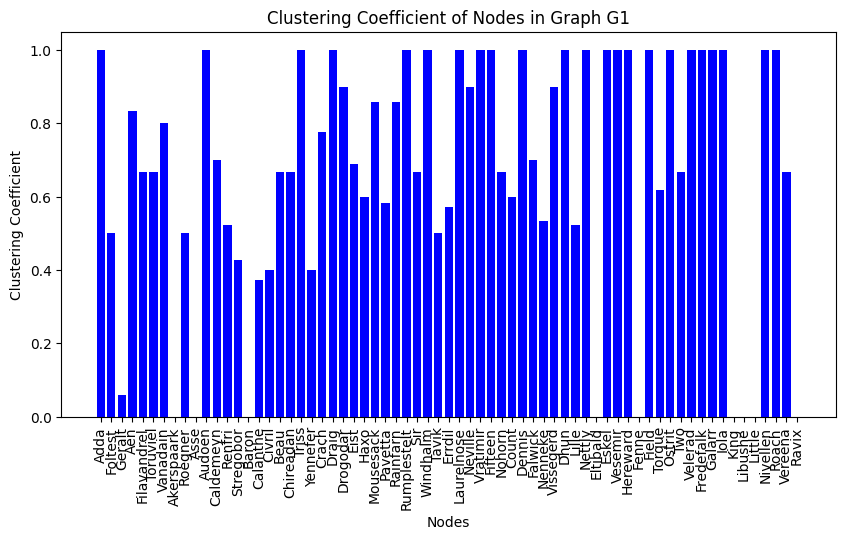

In [198]:
# BOOK 1
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_1.keys()
clustering_values = clustering_coefficient_1.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [213]:
# # BOOK 2
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_2.keys()
# clustering_values = clustering_coefficient_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_3.keys()
# clustering_values = clustering_coefficient_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 4

# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_4.keys()
# clustering_values = clustering_coefficient_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 5

# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_5.keys()
# clustering_values = clustering_coefficient_5.values()

# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 6

# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_6.keys()
# clustering_values = clustering_coefficient_6.values()

# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 7

# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_7.keys()
# clustering_values = clustering_coefficient_7.values()

# plt.figure(figsize=(15,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Clustering coefficient ***distribution***

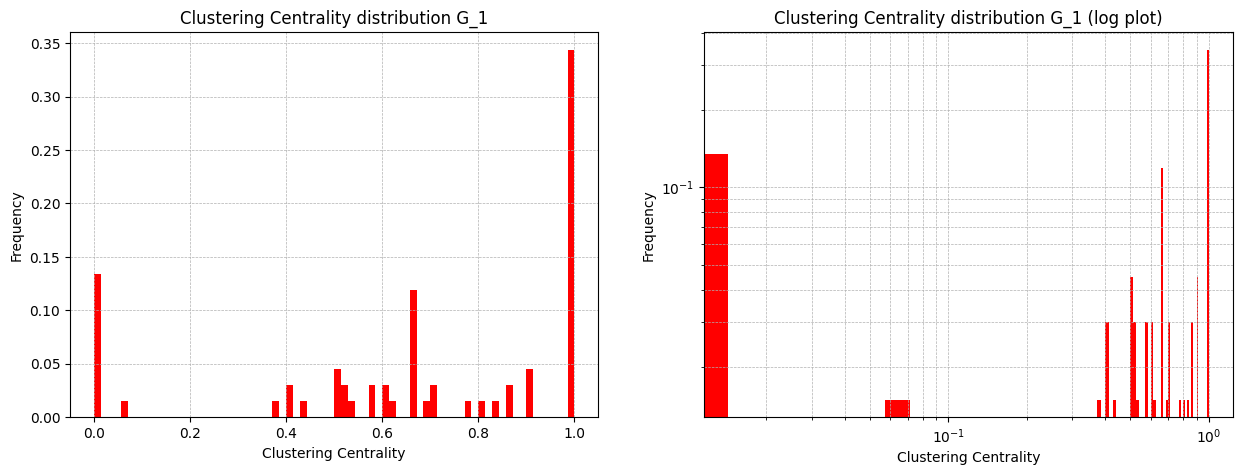

In [215]:
# with frequencies on the y axis (normal scale on the left, log scale on the right)

# Extract the values and compute the frequencies
values = list(clustering_coefficient_1.values())
frequencies = np.bincount(values)


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(values, bins=70, color = 'r', weights=np.ones(len(values)) / len(values))
plt.xlabel('Clustering Centrality')
plt.ylabel('Frequency')
plt.title('Clustering Centrality distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(1, 2, 2)
#log plot
plt.hist(values, bins=70, color = 'r', weights=np.ones(len(values)) / len(values), log = True)
plt.xscale('log')
plt.xlabel('Clustering Centrality')
plt.ylabel('Frequency')
plt.title('Clustering Centrality distribution G_1 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


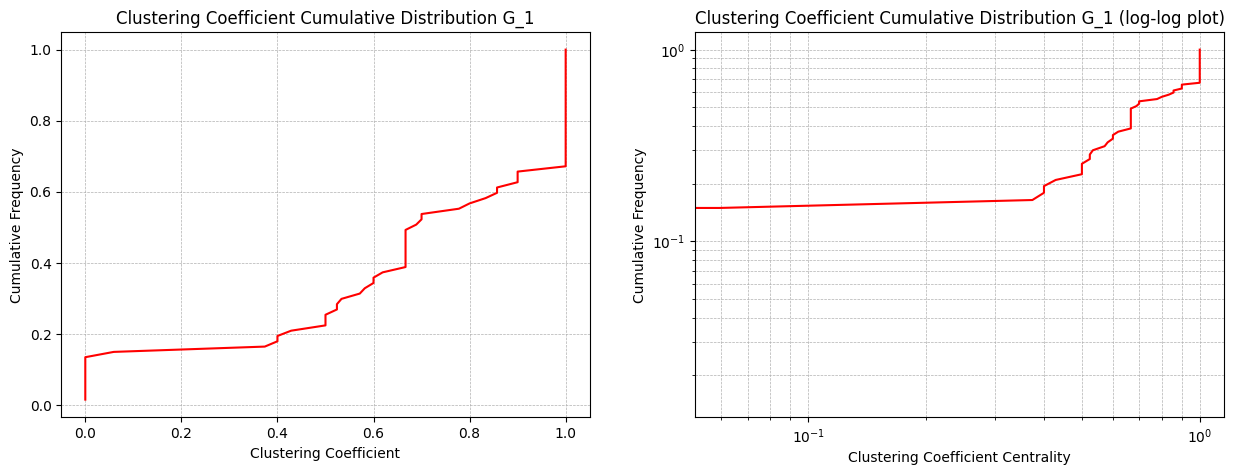

In [217]:
# try to find the cumulative

# Extract the values and compute the frequencies
values = list(clustering_coefficient_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Cumulative Frequency')
plt.title('Clustering Coefficient Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1, 2, 2)
#log plot
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Clustering Coefficient Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Clustering Coefficient Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


## Structural equivalence

In [205]:
#import sys
#np.set_printoptions(threshold=sys.maxsize) # to print the whole matrix without truncation

# Compute adjacency matrix
A_1 = nx.adjacency_matrix(G_1)
A_2 = nx.adjacency_matrix(G_2)
A_3 = nx.adjacency_matrix(G_3)
A_4 = nx.adjacency_matrix(G_4)
A_5 = nx.adjacency_matrix(G_5)
A_6 = nx.adjacency_matrix(G_6)
A_7 = nx.adjacency_matrix(G_7)


def structural_equiv(A):
  return np.inner(A.toarray(), A.toarray()) / (np.linalg.norm(A.toarray(), axis=1) * np.linalg.norm(A.toarray(), axis=1)[:, None])

# Compute structural equivalence (cosine similarity of adjacency matrix rows)
structural_equivalence_1 = structural_equiv(A_1)
structural_equivalence_2 = structural_equiv(A_2)
structural_equivalence_3 = structural_equiv(A_3)
structural_equivalence_4 = structural_equiv(A_4)
structural_equivalence_5 = structural_equiv(A_5)
structural_equivalence_6 = structural_equiv(A_6)
structural_equivalence_7 = structural_equiv(A_7)


print(structural_equivalence_7)
# put a threshold on values to select only couples of nodes with a consistent number of common neighbours

[[1.         0.2        0.63245553 ... 0.         0.         0.        ]
 [0.2        1.         0.15811388 ... 0.         0.         0.        ]
 [0.63245553 0.15811388 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


## Assortative mixing by degree

In [206]:
# A positive value indicates a correlation between nodes of similar degree (high with high, low with low)
# while a negative value indicates a correlation between nodes of different degree
r_1 = nx.degree_assortativity_coefficient(G_1)

print("Degree assortativity coefficient:", r_1)
# Negative result -> high degree nodes interact more with low degree nodes
# a star-like graph (see picture on the slide)

Degree assortativity coefficient: -0.2505522119404024


In [207]:
r_1 = nx.degree_assortativity_coefficient(G_1)
r_2 = nx.degree_assortativity_coefficient(G_2)
r_3 = nx.degree_assortativity_coefficient(G_3)
r_4 = nx.degree_assortativity_coefficient(G_4)
r_5 = nx.degree_assortativity_coefficient(G_5)
r_6 = nx.degree_assortativity_coefficient(G_6)
r_7 = nx.degree_assortativity_coefficient(G_7)

print("Degree assortativity coefficient book 1:", r_1)
print("Degree assortativity coefficient book 2:", r_2)
print("Degree assortativity coefficient book 3:", r_3)
print("Degree assortativity coefficient book 4:", r_4)
print("Degree assortativity coefficient book 5:", r_5)
print("Degree assortativity coefficient book 6:", r_6)
print("Degree assortativity coefficient book 7:", r_7)

Degree assortativity coefficient book 1: -0.2505522119404024
Degree assortativity coefficient book 2: -0.3918270416897044
Degree assortativity coefficient book 3: -0.2367110202879257
Degree assortativity coefficient book 4: -0.25321777572121285
Degree assortativity coefficient book 5: -0.24594744728989135
Degree assortativity coefficient book 6: -0.1854984742624426
Degree assortativity coefficient book 7: -0.14474127323748


## Density

In [208]:
density_1 = nx.density(G_1)
density_2 = nx.density(G_2)
density_3 = nx.density(G_3)
density_4 = nx.density(G_4)
density_5 = nx.density(G_5)
density_6 = nx.density(G_6)
density_7 = nx.density(G_7)

print(density_1)
print(density_2)
print(density_3)
print(density_4)
print(density_5)
print(density_6)
print(density_7)

0.08005427408412483
0.1492063492063492
0.12727272727272726
0.08962679988245666
0.11017543859649123
0.09076682316118936
0.06660772178013558


In [209]:
import cpnet

# Load an algorithm for detecting core-periphery structure in networks
algorithm = cpnet.KM_config()

# Pass your graph object to the algorithm
algorithm.detect(G_1)

# Retrieve the results
c = algorithm.get_pair_id()  # Group ids: nodes having the same integer belong to the same group
x = algorithm.get_coreness()  # Coreness ranging between 0 and 1. A larger value indicates that the node is closer to the core

print(c)
print(x)

# display in modo carino come dataframe (SARA)
# prova a visualizzare i gruppi con diversi colori

{'Adda': 8, 'Foltest': 8, 'Geralt': 3, 'Aen': 0, 'Filavandrel': 0, 'Toruviel': 0, 'Vanadain': 0, 'Akerspaark': 6, 'Roegner': 6, 'Asse': 3, 'Audoen': 1, 'Caldemeyn': 1, 'Renfri': 1, 'Stregobor': 1, 'Baron': 2, 'Calanthe': 6, 'Civril': 2, 'Beau': 3, 'Chireadan': 3, 'Triss': 3, 'Yennefer': 3, 'Crach': 6, 'Draig': 6, 'Drogodar': 6, 'Eist': 6, 'Haxo': 6, 'Mousesack': 6, 'Pavetta': 6, 'Rainfarn': 6, 'Rumplestelt': 4, 'Sir': 4, 'Windhalm': 6, 'Tavik': 2, 'Errdil': 3, 'Laurelnose': 3, 'Neville': 3, 'Vratimir': 3, 'Fifteen': 2, 'Nohorn': 2, 'Count': 5, 'Dennis': 5, 'Falwick': 5, 'Nenneke': 5, 'Vissegerd': 6, 'Dhun': 7, 'Lille': 0, 'Nettly': 7, 'Eltibald': 3, 'Eskel': 3, 'Vesemir': 3, 'Hereward': 5, 'Fenne': 3, 'Field': 0, 'Torque': 0, 'Ostrit': 8, 'Two': 3, 'Velerad': 8, 'Fredefalk': 1, 'Galarr': 0, 'Iola': 3, 'King': 3, 'Libushe': 3, 'Little': 3, 'Nivellen': 9, 'Roach': 9, 'Vereena': 9, 'Ravix': 6}
{'Adda': 0, 'Foltest': 1, 'Geralt': 0, 'Aen': 0, 'Filavandrel': 1, 'Toruviel': 1, 'Vanadain': 1,